In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import emoji
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import get_tweets

%matplotlib inline

In [2]:
conservative  = pd.read_csv("data/conservative.csv")
conservative = conservative[conservative.lang == "en"]
liberal  = pd.read_csv("data/liberal.csv")
liberal = liberal[liberal.lang == "en"]

In [3]:
conservative.head()
liberal.head()

,Unnamed: 0,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,hashtags,...,retweet_count,retweeted,retweeted_status_id,source,text,topic,truncated,user_id,user_mentions,withheld_in_countries
0,0,NaN,NaN,2020-08-22 14:52:56+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,67,False,1.296929e+18,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @Bee42681881: The World Heath Organisation ...,coronavirus,False,813739338831892480,Bee 🇬🇧,NaN
1,1,NaN,NaN,2020-08-22 14:52:56+00:00,"{'hashtags': [{'text': 'India', 'indices': [21...",NaN,0,False,NaN,"India, Coronavirus",...,5,False,1.297184e+18,"<a href=""http://twitter.com/download/android"" ...",RT @sri50: Just in - #India crosses 3 million ...,coronavirus,False,155468406,Sreedhar Pillai,NaN
5,5,NaN,NaN,2020-08-22 14:52:55+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,2284,False,1.297147e+18,"<a href=""http://twitter.com/download/android"" ...","RT @svdate: 175,416 Americans have died from t...",coronavirus,False,745721910927863808,S.V. Dáte,NaN
6,6,NaN,NaN,2020-08-22 14:52:55+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,0,False,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",Donald Trump pushed a baseless conspiracy theo...,coronavirus,True,10684532,NaN,NaN
12,12,NaN,NaN,2020-08-22 14:52:55+00:00,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,NaN,...,98,False,1.297182e+18,"<a href=""http://twitter.com/#!/download/ipad"" ...",RT @nytimes: Some states and school districts ...,coronavirus,False,1063269367,The New York Times,NaN


The above twitter data was scraped and saved to .csv's using the extracting_tweets.ipynb notebook. Functions for pulling the tweets and cleaning them are located in the get_tweets.py script that is imported in this notebook as well.

In [4]:
conservative_clean = get_tweets.clean_tweets(conservative)
conservative_clean.text

/Users/sawyer/Desktop/Data Science @ Denver/Summer 2020/DS Tools/Final_Project/get_tweets.py:163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaner['text'] = data_cleaner['text'].apply(lambda x: replace_foreign_characters(x)).str.strip()
/Users/sawyer/Desktop/Data Science @ Denver/Summer 2020/DS Tools/Final_Project/get_tweets.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaner['text'] = data_cleaner.text.apply(text_cleaner)


0              This Trump supporter resort . This depth .
1       John Brennen spokesman say Brennen subject cri...
2         Tough choice GOP Postal Service Trump belittles
3       Per pool , Trump arrived private golf club out...
4       Biden mentioned God acceptance speech 5 time ....
                              ...                        
4894    SUSPICIOUS - PRIORITY SE ASH ST / SE 119TH AVE...
4895    VANDALISM - PRIORITY 100 NW 19TH AVE , PO [ Po...
4896    As often pointed , modern Jesus would probably...
4897    So , instead enforcing law , police Portland *...
4898    Another bad night Rioting Portland , Oregon . ...
Name: text, Length: 4296, dtype: object

In [5]:
liberal_clean = get_tweets.clean_tweets(liberal)
liberal_clean.text

0       The World Heath Organisation warns coronavirus...
1       Just - # India cross 3 million # Coronavirus c...
5       175,416 Americans died coronavirus , president...
6       Donald Trump pushed baseless conspiracy theory...
12      Some state school district withholding data co...
                              ...                        
4931    # INDIAunitedtoPostponeJEE_NEET . BREAKING : M...
4932    The wanted break u stupid ! . Revision+ protes...
4933    BREAKING : MASS 'PEACEFUL ' PROTEST BY NEET JE...
4934    What dearest govt ? Votes , right ? . . Then d...
4936    They deviate sending message get deviate sabko...
Name: text, Length: 4202, dtype: object

The clean_tweets function used above works to clean the text within the tweets, i.e. removing links within, "RT"s, hashtags, user mentions, as well as expanding contractions, removing stopwords, and lemmatizing to normalize the text data column.

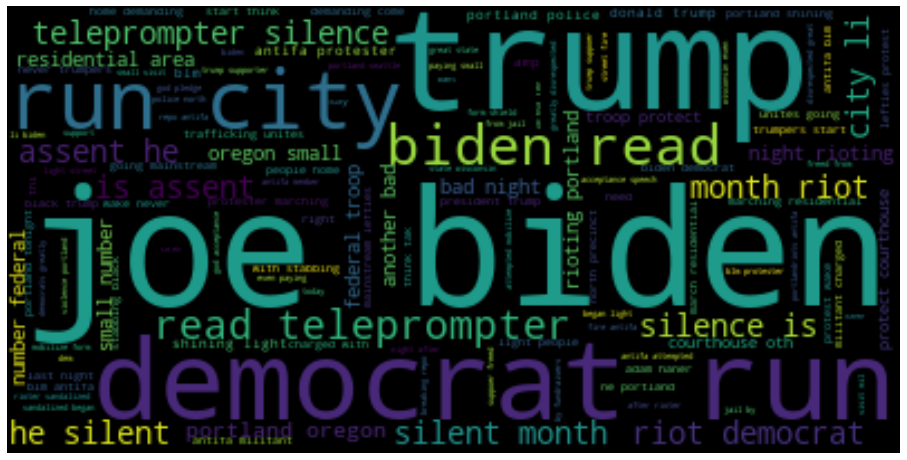

In [6]:
our_tweets = ' '.join(conservative_clean['text'].to_list()).lower()
wordcloud = WordCloud().generate(our_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

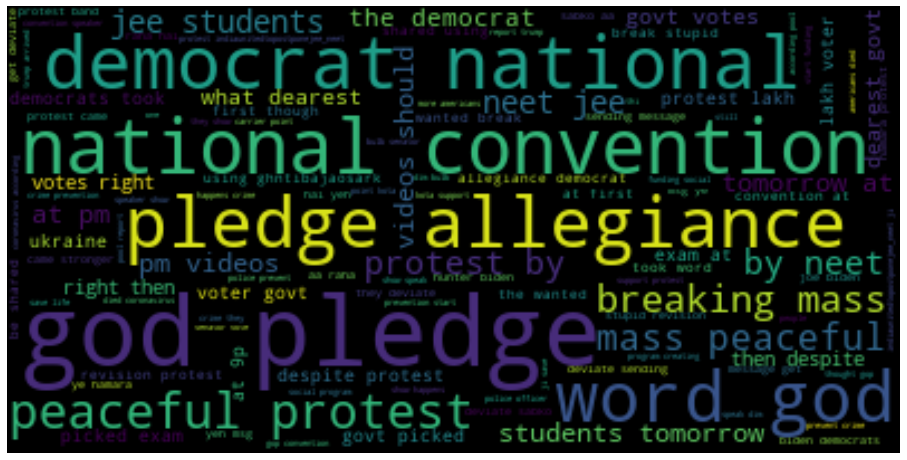

In [7]:
our_tweets = ' '.join(liberal_clean['text'].to_list()).lower()
wordcloud = WordCloud().generate(our_tweets)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()